# Data Mining and Probabilistic Reasoning, WS18/19


Dr. Gjergji Kasneci, The University of Tübingen

-----
## Pandas
-----

###### Date 29/10/2018

Teaching assistants:

 - Vadim Borisov (vadim.borisov@uni-tuebingen.de)

 - Johannes Haug (johannes-christian.haug@uni-tuebingen.de)
 

In [4]:
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv('./data/churn_train.csv', index_col=False)

In [6]:
df.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.



# Meta data:

st - state

acclen - account length

arcode - area code

phnum - phone number

intplan - internet plan (yes/no)

voice - voice

nummailmes - no of email messages

tdmin - total day messages

tdcal - total day time calls

tdchar - total day time charges

temin - total evening time minutes

tecal - total evening time calls

tecahr - total evening time charges

tnmin - total night time minutes

tncal - total night time calls

tnchar - total night time charges

timin - total international minutes

tical - total international calls

tichar - total international charges

ncsc - no. of customer services calls

label - Churned? (True/False)

In [7]:
df.columns

Index(['st', 'acclen', 'arcode', 'phnum', 'intplan', 'voice', 'nummailmes',
       'tdmin', 'tdcal', 'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin',
       'tncal', 'tnchar', 'timin', 'tical', 'tichar', 'ncsc', 'label'],
      dtype='object')

In [8]:
df.shape

(3333, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
st            3333 non-null object
acclen        3333 non-null int64
arcode        3333 non-null int64
phnum         3333 non-null object
intplan       3333 non-null object
voice         3333 non-null object
nummailmes    3333 non-null int64
tdmin         3333 non-null float64
tdcal         3333 non-null int64
tdchar        3333 non-null float64
temin         3333 non-null float64
tecal         3333 non-null int64
tecahr        3333 non-null float64
tnmin         3333 non-null float64
tncal         3333 non-null int64
tnchar        3333 non-null float64
timin         3333 non-null float64
tical         3333 non-null int64
tichar        3333 non-null float64
ncsc          3333 non-null int64
label         3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [10]:
df['label'], target_description = pd.factorize(df['label'])

In [11]:
target_description

Index([' False.', ' True.'], dtype='object')

In [12]:
df.describe()


,acclen,arcode,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [13]:
df.describe(include=['object', 'bool'])

,st,phnum,intplan,voice
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,347-9737,no,no
freq,106,1,3010,2411


In [14]:
df['label'].value_counts()


0    2850
1     483
Name: label, dtype: int64

In [15]:
df['label'].value_counts(normalize=True)


0    0.855086
1    0.144914
Name: label, dtype: float64

# Sorting 

In [16]:
df.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [17]:
df.sort_values(by='tdmin', ascending=False).head()


,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [18]:
df.sort_values(by=['tdmin', 'tdchar'],
        ascending=[True, False]).head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,...,130,13.57,167.1,88,7.52,6.8,1,1.84,4,1
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.00,...,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0
2736,OK,127,510,403-1128,no,yes,27,2.6,113,0.44,...,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
2753,OH,134,415,406-4158,no,no,0,7.8,86,1.33,...,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0


In [19]:
df['acclen'].mean()


101.06480648064806

In [20]:
df[df['st'] == 'OH'].mean()


st            341.846154
acclen        341.846154
arcode        341.846154
phnum         341.846154
intplan       341.846154
voice         341.846154
nummailmes    341.846154
tdmin         183.274359
tdcal          99.628205
tdchar         31.157564
temin         206.441026
tecal         101.205128
tecahr         17.547821
tnmin         204.491026
tncal         103.256410
tnchar          9.201923
timin          10.297436
tical           4.371795
tichar          2.781026
ncsc            1.358974
label           0.128205
dtype: float64

In [21]:
df[df['st'] == 'OH']['acclen'].mean()


102.15384615384616

# Indexing `.iloc` vs `.loc`

In [22]:
df.iloc[1]

st                   OH
acclen              107
arcode              415
phnum          371-7191
intplan              no
voice               yes
nummailmes           26
tdmin             161.6
tdcal               123
tdchar            27.47
temin             195.5
tecal               103
tecahr            16.62
tnmin             254.4
tncal               103
tnchar            11.45
timin              13.7
tical                 3
tichar              3.7
ncsc                  1
label                 0
Name: 1, dtype: object

In [23]:
df.loc[1]

st                   OH
acclen              107
arcode              415
phnum          371-7191
intplan              no
voice               yes
nummailmes           26
tdmin             161.6
tdcal               123
tdchar            27.47
temin             195.5
tecal               103
tecahr            16.62
tnmin             254.4
tncal               103
tnchar            11.45
timin              13.7
tical                 3
tichar              3.7
ncsc                  1
label                 0
Name: 1, dtype: object

In [24]:
samples = df.sample(10, random_state=444)
samples

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
1632,KY,112,415,360-8135,no,no,0,170.5,113,28.99,...,129,16.42,188.0,91,8.46,11.2,6,3.02,0,0
1765,NM,111,415,348-6720,no,no,0,132.6,125,22.54,...,67,18.79,127.9,101,5.76,12.7,2,3.43,4,1
3146,MS,143,510,406-7670,no,no,0,155.4,112,26.42,...,92,24.73,228.4,91,10.28,13.9,5,3.75,1,0
473,WV,72,510,418-6651,no,yes,33,96.6,59,16.42,...,98,26.81,163.3,117,7.35,6.2,4,1.67,4,1
2745,PA,61,408,343-1347,no,yes,40,105.0,78,17.85,...,100,15.35,174.1,115,7.83,10.2,2,2.75,2,1
245,SC,22,408,331-5138,no,no,0,110.3,107,18.75,...,93,14.15,202.3,96,9.10,9.5,5,2.57,0,0
1558,DE,79,415,391-8124,no,yes,34,103.7,100,17.63,...,78,20.09,256.6,102,11.55,14.8,4,4.00,2,0
861,MO,58,415,353-7822,no,no,0,149.4,145,25.40,...,105,16.70,209.5,108,9.43,14.9,3,4.02,1,0
1456,CT,106,510,330-1175,no,yes,33,81.6,120,13.87,...,85,20.03,150.9,113,6.79,9.9,4,2.67,1,0
1250,NV,81,415,395-5783,no,no,0,145.4,132,24.72,...,91,10.99,186.4,109,8.39,5.2,4,1.40,1,0


In [25]:
samples.iloc[1]

st                   NM
acclen              111
arcode              415
phnum          348-6720
intplan              no
voice                no
nummailmes            0
tdmin             132.6
tdcal               125
tdchar            22.54
temin             221.1
tecal                67
tecahr            18.79
tnmin             127.9
tncal               101
tnchar             5.76
timin              12.7
tical                 2
tichar             3.43
ncsc                  4
label                 1
Name: 1765, dtype: object

In [26]:
samples.loc[1]

KeyError: 'the label [1] is not in the [index]'

# Functions & Pandas 

In [27]:
df.apply(np.max) 


st                   WY
acclen              243
arcode              510
phnum          422-9964
intplan             yes
voice               yes
nummailmes           51
tdmin             350.8
tdcal               165
tdchar            59.64
temin             363.7
tecal               170
tecahr            30.91
tnmin               395
tncal               175
tnchar            17.77
timin                20
tical                20
tichar              5.4
ncsc                  9
label                 1
dtype: object

In [28]:
df.apply(lambda x: max(x)) 

st                   WY
acclen              243
arcode              510
phnum          422-9964
intplan             yes
voice               yes
nummailmes           51
tdmin             350.8
tdcal               165
tdchar            59.64
temin             363.7
tecal               170
tecahr            30.91
tnmin               395
tncal               175
tnchar            17.77
timin                20
tical                20
tichar              5.4
ncsc                  9
label                 1
dtype: object

# Grouping 
 - df.groupby(by=grouping_columns)[columns_to_show].function()


In [29]:
df.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [30]:
df.groupby(by='st')['acclen'].min()

st
AK     1
AL     8
AR     5
AZ    12
CA    33
CO    22
CT     3
DC    11
DE     2
FL    22
GA    18
HI     3
IA     1
ID    24
IL    16
IN     7
KS    24
KY    21
LA     9
MA    13
MD    18
ME    19
MI    30
MN    13
MO     6
MS     1
MT    10
NC    26
ND    12
NE    21
NH    13
NJ     1
NM    16
NV     3
NY     9
OH    29
OK    15
OR     6
PA    28
RI    17
SC     1
SD    20
TN     1
TX     1
UT     4
VA    10
VT    38
WA    13
WI    16
WV    11
WY    16
Name: acclen, dtype: int64

In [31]:
df.groupby(by='st')['acclen'].agg([min, max, np.std, np.mean])

,min,max,std,mean
st,,,,
AK,1,177,38.300176,97.192308
AL,8,200,41.539969,98.025000
AR,5,185,37.007252,96.981818
AZ,12,192,32.263778,100.468750
CA,33,185,33.738800,99.235294
CO,22,192,37.815822,102.545455
CT,3,212,42.682465,99.040541
DC,11,217,40.380463,105.722222
DE,2,224,36.480266,101.918033


# DataFrame manipulations 


In [32]:
df.head(6)

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


In [33]:
df['new_feature'] = df['ncsc'] /  df['acclen']

In [34]:
df.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label,new_feature
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0.007812
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.009346
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.000000
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0.023810
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.040000


# Visualizations 

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns #pip install seaborn 

plt.style.use('ggplot')
plt.figure(figsize=(13, 10))

<Figure size 936x720 with 0 Axes>

<Figure size 936x720 with 0 Axes>

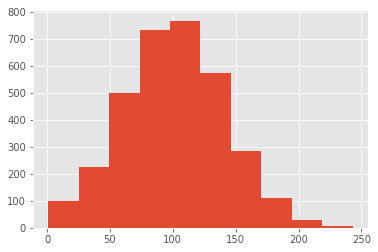

In [37]:
df['acclen'].hist()

# Quantize-data

In [38]:
df['new_feature_2'] = pd.np.digitize(df.ncsc, bins = [0, 1, 2, 3])

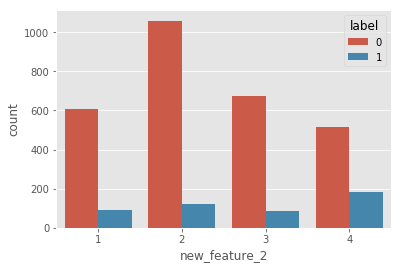

In [39]:
sns.countplot(x='new_feature_2', hue='label', data=df);

# SQL and Pandas 

SQL query: 

```SQL
SELECT * FROM df WHERE st = 'KS' LIMIT 5;
```

Pandas query: 

```python
df[df['st'] == 'KS'][:5]
```